# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sts

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Import pprint
from pprint import pprint

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
print('Beginning Data Retrieval')
print('------------------------')
#For loop for Weather API calls
city_names = []
city_id = []
country = []
cloud = []
dt = []
lats = []
lngs = []
hums = []
max_temps = []
ws = []
record = 0
for city in cities:
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}'
    try:
        response = requests.get(url).json()
        city_names.append(response['name'])
        city_id.append(response['id'])
        country.append(response['sys']['country'])
        cloud.append(response['clouds']['all'])
        dt.append(response['dt'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        hums.append(response['main']['humidity'])
        max_temps.append(response['main']['temp_max'])
        ws.append(response['wind']['speed'])
        print(f'City Name: {city}, City Number: {record}')
        record += 1
    except:
        print('City not found')

Beginning Data Retrieval
------------------------
City Name: westport, City Number: 0
City Name: palmer, City Number: 1
City Name: ponta do sol, City Number: 2
City Name: dikson, City Number: 3
City Name: nyurba, City Number: 4
City Name: mogadishu, City Number: 5
City not found
City Name: cabo san lucas, City Number: 6
City Name: hermanus, City Number: 7
City Name: komsomolskiy, City Number: 8
City Name: busselton, City Number: 9
City Name: bredasdorp, City Number: 10
City not found
City Name: hambantota, City Number: 11
City Name: oranjemund, City Number: 12
City Name: high rock, City Number: 13
City not found
City Name: albany, City Number: 14
City Name: mar del plata, City Number: 15
City Name: hilo, City Number: 16
City Name: carnarvon, City Number: 17
City Name: beringovskiy, City Number: 18
City not found
City Name: barrow, City Number: 19
City Name: alice springs, City Number: 20
City Name: mitsamiouli, City Number: 21
City not found
City Name: tukrah, City Number: 22
City Name

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
city_dict = {'City_ID':city_id,'City':city_names,'Cloudiness':cloud,
            'Country':country,'Date':dt,'Humidity':hums,'Lat':lats,
            'Lng':lngs,'Max Temp':max_temps,'Wind Speed':ws}
city_df = pd.DataFrame(city_dict)
city_csv = city_df.to_csv('random_cities.csv',index=True)
city_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,4845585,Westport,1,US,1612117089,45,41.1415,-73.3579,25.00,5.12
1,4946620,Palmer,75,US,1612117221,48,42.1584,-72.3287,23.00,4.61
2,2264557,Ponta do Sol,40,PT,1612117254,77,32.6667,-17.1000,64.40,3.44
3,1507390,Dikson,35,RU,1612117091,78,73.5069,80.5464,-27.85,8.70
4,2018735,Nyurba,58,RU,1612117255,76,63.2842,118.3319,-46.97,3.62
...,...,...,...,...,...,...,...,...,...,...
570,2412408,Nioro,66,GM,1612117320,8,13.3500,-15.7500,99.39,7.45
571,1608451,Nan,83,TH,1612117320,66,18.8333,100.6667,67.39,1.25
572,3385538,Vargem Grande,91,BR,1612117050,69,-3.5431,-43.9158,86.20,1.16
573,298846,Tunceli,75,TR,1612117172,75,39.1083,39.5471,39.20,3.44


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
# Get the indices of cities that have humidity over 100%.
hum_100 = city_df.loc[city_df['Humidity'] > 100].index
print(hum_100)

Int64Index([], dtype='int64')


In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#city_df_2 = city_df.drop(hum_100[0], inplace=False)
#city_df_2

#No cities with humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

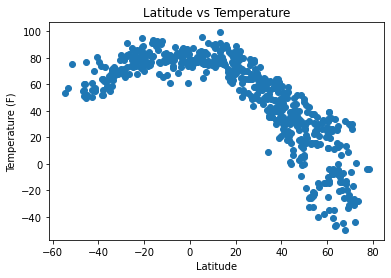

In [19]:
lat = city_df['Lat']
temp = city_df['Max Temp']

plt.scatter(lat,temp)
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

## Latitude vs. Humidity Plot

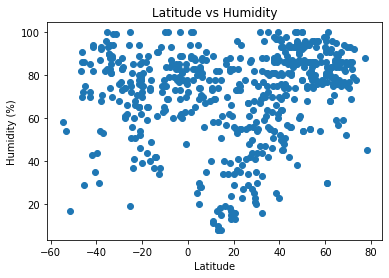

In [20]:
hum = city_df['Humidity']
plt.scatter(lat,hum)
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

## Latitude vs. Cloudiness Plot

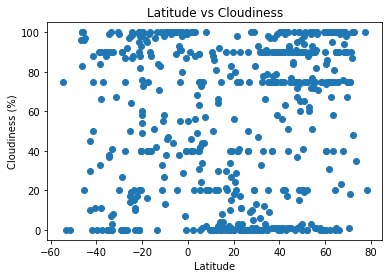

In [21]:
cloud = city_df['Cloudiness']
plt.scatter(lat,cloud)
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

## Latitude vs. Wind Speed Plot

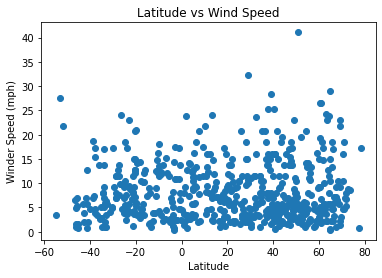

In [22]:
ws = city_df['Wind Speed']
plt.scatter(lat,ws)
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Winder Speed (mph)')
plt.show()

## Linear Regression

In [23]:
north = city_df.loc[city_df['Lat'] >= 0]
south = city_df.loc[city_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R value = -0.8689324549552024


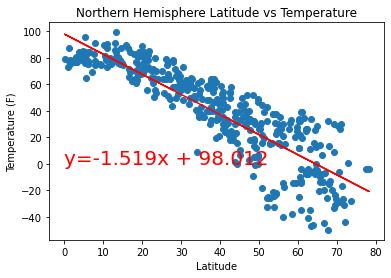

In [24]:
north_temp = north['Max Temp']
north_lat = north['Lat']

plt.scatter(north_lat,north_temp)
plt.title('Northern Hemisphere Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(north_lat,north_temp)
regress_line = north_lat*slope + intercept
equation = 'y=' + str(round(slope,3)) + 'x + ' + str(round(intercept,3))
plt.plot(north_lat,regress_line,color='red')
plt.annotate(equation,(0,0),fontsize=20,color='red')
print('R value = ' + str(rvalue))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R value = 0.6392376635552904


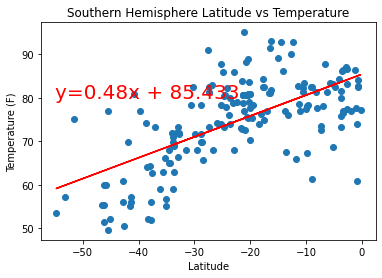

In [25]:
south_temp = south['Max Temp']
south_lat = south['Lat']

plt.scatter(south_lat,south_temp)
plt.title('Southern Hemisphere Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(south_lat,south_temp)
regress_line = south_lat*slope + intercept
equation = 'y=' + str(round(slope,3)) + 'x + ' + str(round(intercept,3))
plt.plot(south_lat,regress_line,color='red')
plt.annotate(equation,(-55,80),fontsize=20,color='red')
print('R value = ' + str(rvalue))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R value = 0.38522235009062605


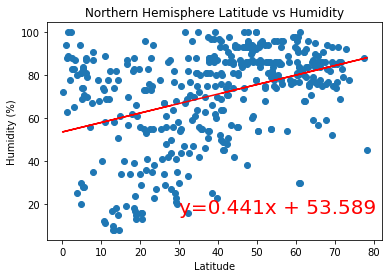

In [26]:
north_hum = north['Humidity']
north_lat = north['Lat']

plt.scatter(north_lat,north_hum)
plt.title('Northern Hemisphere Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(north_lat,north_hum)
regress_line = north_lat*slope + intercept
equation = 'y=' + str(round(slope,3)) + 'x + ' + str(round(intercept,3))
plt.plot(north_lat,regress_line,color='red')
plt.annotate(equation,(30,16),fontsize=20,color='red')
print('R value = ' + str(rvalue))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R value = 0.03902493823886426


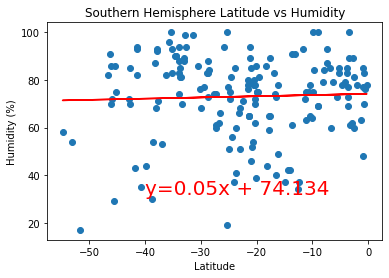

In [27]:
south_hum = south['Humidity']
south_lat = south['Lat']

plt.scatter(south_lat,south_hum)
plt.title('Southern Hemisphere Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(south_lat,south_hum)
regress_line = south_lat*slope + intercept
equation = 'y=' + str(round(slope,3)) + 'x + ' + str(round(intercept,3))
plt.plot(south_lat,regress_line,color='red')
plt.annotate(equation,(-40,32),fontsize=20,color='red')
print('R value = ' + str(rvalue))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R value = 0.3401189344037979


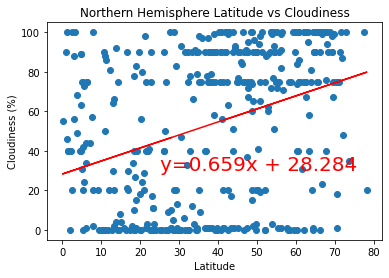

In [28]:
north_cloud = north['Cloudiness']
north_lat = north['Lat']

plt.scatter(north_lat,north_cloud)
plt.title('Northern Hemisphere Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(north_lat,north_cloud)
regress_line = north_lat*slope + intercept
equation = 'y=' + str(round(slope,3)) + 'x + ' + str(round(intercept,3))
plt.plot(north_lat,regress_line,color='red')
plt.annotate(equation,(25,30),fontsize=20,color='red')
print('R value = ' + str(rvalue))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R value = 0.2311984014438989


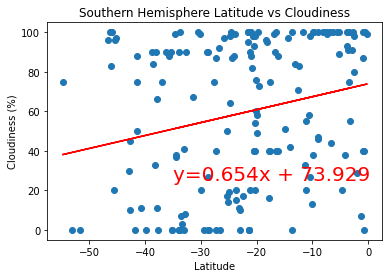

In [29]:
south_cloud = south['Cloudiness']
south_lat = south['Lat']

plt.scatter(south_lat,south_cloud)
plt.title('Southern Hemisphere Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(south_lat,south_cloud)
regress_line = south_lat*slope + intercept
equation = 'y=' + str(round(slope,3)) + 'x + ' + str(round(intercept,3))
plt.plot(south_lat,regress_line,color='red')
plt.annotate(equation,(-35,25),fontsize=20,color='red')
print('R value = ' + str(rvalue))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R value = 0.011956396147917573


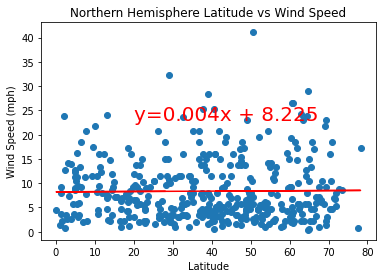

In [30]:
north_ws = north['Wind Speed']
north_lat = north['Lat']

plt.scatter(north_lat,north_ws)
plt.title('Northern Hemisphere Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(north_lat,north_ws)
regress_line = north_lat*slope + intercept
equation = 'y=' + str(round(slope,3)) + 'x + ' + str(round(intercept,3))
plt.plot(north_lat,regress_line,color='red')
plt.annotate(equation,(20,23),fontsize=20,color='red')
print('R value = ' + str(rvalue))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R value = 0.020711559704280437


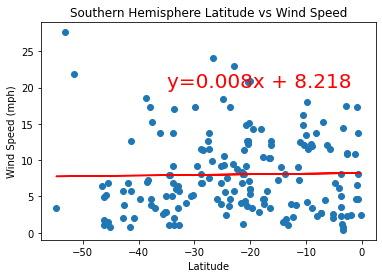

In [31]:
south_ws = south['Wind Speed']
south_lat = south['Lat']

plt.scatter(south_lat,south_ws)
plt.title('Southern Hemisphere Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(south_lat,south_ws)
regress_line = south_lat*slope + intercept
equation = 'y=' + str(round(slope,3)) + 'x + ' + str(round(intercept,3))
plt.plot(south_lat,regress_line,color='red')
plt.annotate(equation,(-35,20),fontsize=20,color='red')
print('R value = ' + str(rvalue))